In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from tweepy import Stream                   
from tweepy.streaming import StreamListener
import json
import csv
import os
from os import path
import got3

In [2]:
import os
filepath = os.getcwd()
#def clean_tweet(tweet):
#    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\/\/\S+)", " ", tweet).split())

In [3]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\/\/\S+)", " ", tweet).split())

In [4]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [5]:
def write_to_csv(tweet):
    #fields = ["timestamp", "tweet", "user", "verified", "url"]
    fields = ["Date", "Positve", "Negative", "Neutral",]    
    filename = filepath +'\StockExchanges\SPY10_10Y_Sentiment.csv'
    fileState = path.isfile(filename)
    with open(filename,'a') as fd:        
        writer = csv.writer(fd)
        if(not fileState):
            writer.writerow(fields)
        else:
            print(tweet)
            writer.writerow([tweet.Date, tweet.Positive, tweet.Negative, tweet.Neutral])
 

In [6]:
import pandas as pd

tweets_data_path = filepath + "\StockExchanges\SPY_10Y_TwitterData.csv"
pdData = pd.read_csv(tweets_data_path, delimiter=",")

all_tweets = []
count = 0
pdData['Date'] = pd.to_datetime(pdData['Date']).dt.date
#list(pdData.groupby('Date')['Tweet'])
pdata = pdData.groupby('Date')['Tweet']
print (pdata.head())


0       b'Laurel Wealth Advisors Inc. Decreases Holdin...
1       b'SPDR S&P 500 ETF Trust $ SPY Shares Up 5.1% ...
2       b'USA: SPDR S&P 500 ETF Trust \xe2\x80\xa2 Dec...
3       b'USA: SPDR S&P 500 ETF Trust \xe2\x80\xa2 Dec...
4       b'SOCIAL ACTIVITY: $ SPYD - SPDR Series Trust ...
5       b'Blue Edge Capital LLC Acquires 435 Shares of...
8       b'SOCIAL ACTIVITY: $ SPYG - SPDR Series Trust ...
9       b'UPSIDE MOMENTUM ALERT: $ SPYG SPDR Series Tr...
10      b'Vista Private Wealth Partners. LLC Purchases...
11      b'SPDR S&P 500 ETF Trust (SPY) Shares Bought b...
12      b'VOLUME RADAR ALERT: $ SPYG SPDR Series Trust...
13      b'SPDR S&P 500 ETF Trust (SPY) Position Booste...
14      b'Traders Buy Shares of SPDR S&P 500 ETF Trust...
15      b'SPDR S&P 500 ETF Trust (SPY) Shares Sold by ...
16      b'Traders Buy SPDR S&P 500 ETF Trust $ SPY on ...
17      b'\xe3\x83\x96\xe3\x83\xad\xe3\x82\xb0\xe3\x82...
18      b'SPDR S&P 500 ETF Trust $ SPY Increases Divid...
19      b'Inve

In [7]:
for date, twt in pdata:
    #print (date)
    tweets_day = {}
    tweets_data = []
    tweets_day['Date'] = date
    count = 0
    for t in twt:
        parsedTweet = {}
        #parsedTweet['text'] = t
        parsedTweet['sentiment'] = get_tweet_sentiment(t)
        tweets_data.append(parsedTweet)
        count = count + 1
    #tweets_day['data'] = tweets_data
    #print (tweets_day)
    
    ptweets = [tweet for tweet in tweets_data if tweet['sentiment'] == 'positive']
    tweets_day['Positive'] = 100*len(ptweets)/len(tweets_data)
    ntweets = [tweet for tweet in tweets_data if tweet['sentiment'] == 'negative']
    tweets_day['Negative'] = 100*len(ntweets)/len(tweets_data)
    tweets_day['Neutral'] = 100*(len(tweets_data) - len(ntweets) - len(ptweets))/len(tweets_data)
    tweets_day['Count'] = count
    print (tweets_day)
    all_tweets.append(tweets_day)
#print(all_tweets)

{'Date': datetime.date(2012, 2, 15), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2012, 2, 19), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2012, 3, 1), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2012, 3, 7), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 6}
{'Date': datetime.date(2012, 3, 14), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2012, 3, 15), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2012, 3, 23), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2012, 3, 28), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2012, 3, 30), 'Positive': 50.0, 'Negative': 50.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2012, 4, 5), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Coun

{'Date': datetime.date(2013, 8, 15), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2013, 8, 16), 'Positive': 53.84615384615385, 'Negative': 0.0, 'Neutral': 46.15384615384615, 'Count': 13}
{'Date': datetime.date(2013, 8, 17), 'Positive': 33.333333333333336, 'Negative': 22.22222222222222, 'Neutral': 44.44444444444444, 'Count': 9}
{'Date': datetime.date(2013, 8, 18), 'Positive': 0.0, 'Negative': 50.0, 'Neutral': 50.0, 'Count': 6}
{'Date': datetime.date(2013, 8, 19), 'Positive': 42.857142857142854, 'Negative': 28.571428571428573, 'Neutral': 28.571428571428573, 'Count': 7}
{'Date': datetime.date(2013, 8, 20), 'Positive': 0.0, 'Negative': 50.0, 'Neutral': 50.0, 'Count': 2}
{'Date': datetime.date(2013, 8, 21), 'Positive': 51.61290322580645, 'Negative': 6.451612903225806, 'Neutral': 41.935483870967744, 'Count': 31}
{'Date': datetime.date(2013, 8, 22), 'Positive': 10.0, 'Negative': 20.0, 'Neutral': 70.0, 'Count': 10}
{'Date': datetime.date(2013, 8, 23), 

{'Date': datetime.date(2013, 11, 22), 'Positive': 16.666666666666668, 'Negative': 16.666666666666668, 'Neutral': 66.66666666666667, 'Count': 6}
{'Date': datetime.date(2013, 11, 23), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2013, 11, 24), 'Positive': 18.181818181818183, 'Negative': 0.0, 'Neutral': 81.81818181818181, 'Count': 11}
{'Date': datetime.date(2013, 11, 25), 'Positive': 37.5, 'Negative': 50.0, 'Neutral': 12.5, 'Count': 8}
{'Date': datetime.date(2013, 11, 26), 'Positive': 12.5, 'Negative': 25.0, 'Neutral': 62.5, 'Count': 8}
{'Date': datetime.date(2013, 11, 27), 'Positive': 22.22222222222222, 'Negative': 11.11111111111111, 'Neutral': 66.66666666666667, 'Count': 9}
{'Date': datetime.date(2013, 11, 28), 'Positive': 0.0, 'Negative': 100.0, 'Neutral': 0.0, 'Count': 3}
{'Date': datetime.date(2013, 11, 29), 'Positive': 20.0, 'Negative': 20.0, 'Neutral': 60.0, 'Count': 5}
{'Date': datetime.date(2013, 11, 30), 'Positive': 0.0, 'Negative': 0.0,

{'Date': datetime.date(2014, 2, 12), 'Positive': 6.666666666666667, 'Negative': 26.666666666666668, 'Neutral': 66.66666666666667, 'Count': 15}
{'Date': datetime.date(2014, 2, 13), 'Positive': 37.5, 'Negative': 0.0, 'Neutral': 62.5, 'Count': 16}
{'Date': datetime.date(2014, 2, 14), 'Positive': 11.11111111111111, 'Negative': 5.555555555555555, 'Neutral': 83.33333333333333, 'Count': 18}
{'Date': datetime.date(2014, 2, 15), 'Positive': 16.666666666666668, 'Negative': 0.0, 'Neutral': 83.33333333333333, 'Count': 6}
{'Date': datetime.date(2014, 2, 16), 'Positive': 50.0, 'Negative': 0.0, 'Neutral': 50.0, 'Count': 6}
{'Date': datetime.date(2014, 2, 17), 'Positive': 33.333333333333336, 'Negative': 0.0, 'Neutral': 66.66666666666667, 'Count': 9}
{'Date': datetime.date(2014, 2, 18), 'Positive': 11.538461538461538, 'Negative': 23.076923076923077, 'Neutral': 65.38461538461539, 'Count': 26}
{'Date': datetime.date(2014, 2, 19), 'Positive': 18.181818181818183, 'Negative': 9.090909090909092, 'Neutral': 7

{'Date': datetime.date(2014, 5, 5), 'Positive': 14.285714285714286, 'Negative': 0.0, 'Neutral': 85.71428571428571, 'Count': 7}
{'Date': datetime.date(2014, 5, 6), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2014, 5, 7), 'Positive': 33.333333333333336, 'Negative': 33.333333333333336, 'Neutral': 33.333333333333336, 'Count': 3}
{'Date': datetime.date(2014, 5, 8), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 5}
{'Date': datetime.date(2014, 5, 12), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2014, 5, 13), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2014, 5, 21), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2014, 5, 28), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2014, 5, 29), 'Positive': 0.0, 'Negative': 100.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(20

{'Date': datetime.date(2014, 10, 11), 'Positive': 0.0, 'Negative': 100.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2014, 10, 12), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2014, 10, 13), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 3}
{'Date': datetime.date(2014, 10, 14), 'Positive': 50.0, 'Negative': 16.666666666666668, 'Neutral': 33.333333333333336, 'Count': 6}
{'Date': datetime.date(2014, 10, 15), 'Positive': 66.66666666666667, 'Negative': 0.0, 'Neutral': 33.333333333333336, 'Count': 6}
{'Date': datetime.date(2014, 10, 16), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2014, 10, 17), 'Positive': 33.333333333333336, 'Negative': 0.0, 'Neutral': 66.66666666666667, 'Count': 3}
{'Date': datetime.date(2014, 10, 19), 'Positive': 0.0, 'Negative': 85.71428571428571, 'Neutral': 14.285714285714286, 'Count': 7}
{'Date': datetime.date(2014, 10, 20), 'Positive': 50.0, 'Negative': 0.0, '

{'Date': datetime.date(2015, 3, 21), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2015, 3, 22), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2015, 3, 23), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 3, 24), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2015, 3, 26), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 3, 27), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2015, 3, 28), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2015, 3, 30), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2015, 3, 31), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 4, 1), 'Positive': 9.090909090909092, 'Negative': 0.0, 'Neutra

{'Date': datetime.date(2015, 9, 10), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 9, 11), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 9, 13), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2015, 9, 14), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2015, 9, 17), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 6}
{'Date': datetime.date(2015, 9, 18), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 7}
{'Date': datetime.date(2015, 9, 21), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 6}
{'Date': datetime.date(2015, 9, 22), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2015, 9, 23), 'Positive': 0.0, 'Negative': 50.0, 'Neutral': 50.0, 'Count': 2}
{'Date': datetime.date(2015, 9, 24), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'C

{'Date': datetime.date(2016, 1, 27), 'Positive': 33.333333333333336, 'Negative': 0.0, 'Neutral': 66.66666666666667, 'Count': 6}
{'Date': datetime.date(2016, 1, 28), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 5}
{'Date': datetime.date(2016, 1, 29), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2016, 1, 31), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2016, 2, 1), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 4}
{'Date': datetime.date(2016, 2, 2), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2016, 2, 6), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 4}
{'Date': datetime.date(2016, 2, 11), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2016, 2, 12), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 5}
{'Date': datetime.date(2016, 2, 15), 'Positive': 60.0, 'Negative': 

{'Date': datetime.date(2016, 8, 3), 'Positive': 71.42857142857143, 'Negative': 0.0, 'Neutral': 28.571428571428573, 'Count': 7}
{'Date': datetime.date(2016, 8, 4), 'Positive': 28.571428571428573, 'Negative': 0.0, 'Neutral': 71.42857142857143, 'Count': 7}
{'Date': datetime.date(2016, 8, 5), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2016, 8, 6), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2016, 8, 7), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2016, 8, 9), 'Positive': 20.0, 'Negative': 0.0, 'Neutral': 80.0, 'Count': 5}
{'Date': datetime.date(2016, 8, 10), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2016, 8, 12), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2016, 8, 13), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2016, 8, 14), 'Posit

{'Date': datetime.date(2017, 2, 15), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2017, 2, 20), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 6}
{'Date': datetime.date(2017, 2, 21), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2017, 2, 22), 'Positive': 50.0, 'Negative': 50.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2017, 2, 24), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2017, 2, 25), 'Positive': 50.0, 'Negative': 0.0, 'Neutral': 50.0, 'Count': 6}
{'Date': datetime.date(2017, 2, 26), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 8}
{'Date': datetime.date(2017, 2, 27), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2017, 3, 1), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2017, 3, 2), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Cou

{'Date': datetime.date(2017, 8, 24), 'Positive': 80.0, 'Negative': 0.0, 'Neutral': 20.0, 'Count': 5}
{'Date': datetime.date(2017, 8, 25), 'Positive': 7.6923076923076925, 'Negative': 0.0, 'Neutral': 92.3076923076923, 'Count': 13}
{'Date': datetime.date(2017, 8, 26), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2017, 8, 27), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 7}
{'Date': datetime.date(2017, 8, 28), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2017, 8, 30), 'Positive': 50.0, 'Negative': 0.0, 'Neutral': 50.0, 'Count': 2}
{'Date': datetime.date(2017, 8, 31), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 5}
{'Date': datetime.date(2017, 9, 1), 'Positive': 50.0, 'Negative': 33.333333333333336, 'Neutral': 16.666666666666668, 'Count': 12}
{'Date': datetime.date(2017, 9, 3), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2017, 9, 4), 

{'Date': datetime.date(2018, 1, 5), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 5}
{'Date': datetime.date(2018, 1, 6), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 7}
{'Date': datetime.date(2018, 1, 7), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2018, 1, 8), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2018, 1, 9), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 6}
{'Date': datetime.date(2018, 1, 10), 'Positive': 22.22222222222222, 'Negative': 0.0, 'Neutral': 77.77777777777777, 'Count': 9}
{'Date': datetime.date(2018, 1, 11), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 11}
{'Date': datetime.date(2018, 1, 12), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 5}
{'Date': datetime.date(2018, 1, 13), 'Positive': 0.0, 'Negative': 37.5, 'Neutral': 62.5, 'Count': 8}
{'Date': datetime.date(2018, 1, 14), 'Positive': 0.0, 'Negative': 0.0

{'Date': datetime.date(2018, 4, 9), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 4}
{'Date': datetime.date(2018, 4, 10), 'Positive': 16.666666666666668, 'Negative': 0.0, 'Neutral': 83.33333333333333, 'Count': 6}
{'Date': datetime.date(2018, 4, 11), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 11}
{'Date': datetime.date(2018, 4, 12), 'Positive': 8.333333333333334, 'Negative': 0.0, 'Neutral': 91.66666666666667, 'Count': 12}
{'Date': datetime.date(2018, 4, 13), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 11}
{'Date': datetime.date(2018, 4, 14), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 2}
{'Date': datetime.date(2018, 4, 15), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2018, 4, 19), 'Positive': 0.0, 'Negative': 100.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2018, 4, 20), 'Positive': 100.0, 'Negative': 0.0, 'Neutral': 0.0, 'Count': 1}
{'Date': datetime.date(2018, 4, 21),

{'Date': datetime.date(2018, 10, 11), 'Positive': 28.571428571428573, 'Negative': 0.0, 'Neutral': 71.42857142857143, 'Count': 7}
{'Date': datetime.date(2018, 10, 12), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 3}
{'Date': datetime.date(2018, 10, 15), 'Positive': 0.0, 'Negative': 25.0, 'Neutral': 75.0, 'Count': 4}
{'Date': datetime.date(2018, 10, 16), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2018, 10, 17), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 2}
{'Date': datetime.date(2018, 10, 18), 'Positive': 25.0, 'Negative': 25.0, 'Neutral': 50.0, 'Count': 4}
{'Date': datetime.date(2018, 10, 20), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 1}
{'Date': datetime.date(2018, 10, 22), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 4}
{'Date': datetime.date(2018, 10, 23), 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 100.0, 'Count': 4}
{'Date': datetime.date(2018, 10, 24), 'Positive': 0.0,

In [8]:
  #fields = ["timestamp", "tweet", "user", "verified", "url"]
fields = ["Date", "Positve", "Negative", "Neutral", "Total"]
filename = filepath + '\StockExchanges\SPY10_10Y_Sentiment.csv'
fileState = path.isfile(filename)
with open(filename,'a') as fd:        
    writer = csv.writer(fd)
    if(not fileState):
        writer.writerow(fields)
    for sent in all_tweets:
        #tweet = all_tweets[idx]
        #print(sent['Date'])
        writer.writerow([sent['Date'], sent['Positive'], sent['Negative'], sent['Neutral'], sent['Count']])

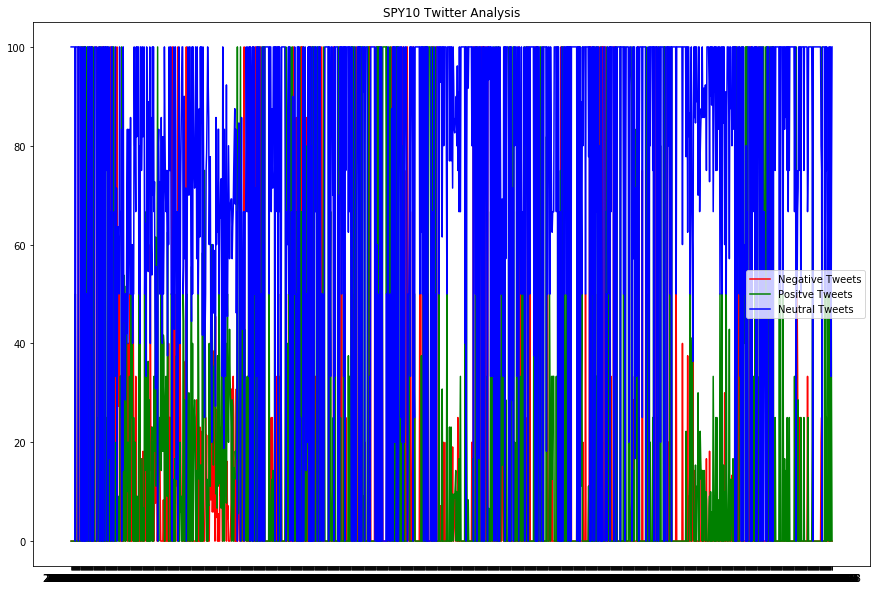

In [10]:
import matplotlib.pyplot as plt
#tweets_analysis_path = "C:\k.v.singh\sjsu\Fall 2019\CMPE297\ResearchPaper\MicrosoftStock_Sentiment_6M.csv"
#tweets_analysis_path = filepath + "\StockExchanges\SPY10_10Y_Sentiment1.csv"
#df = pd.read_csv(tweets_analysis_path, delimiter=",")
df = pd.read_csv(filename, delimiter=",")
positive_analysis = df['Positve']
negative_analysis = df['Negative']

plt.figure(figsize=(15,10))
plt.title('SPY10 Twitter Analysis')
plt.plot(df['Date'], negative_analysis, color='r',label = 'Negative Tweets')
plt.plot(df['Date'], positive_analysis, color='g',label = 'Positve Tweets')
plt.plot(df['Date'],  df['Neutral'], color='b',label = 'Neutral Tweets')
plt.legend()
plt.show()